# U-Net: Convolutional Networks for Biomedical Image Segmentation

## Abstract
The segmentation of biomedical images typically deals with partitioning an image into multiple regions representing anatomical objects of interest. A variety of medical image segmentation problems present significant technical challenges, including heterogeneous pixel intensities, noisy/ill-defined boundaries, and irregular shapes with high variability. This paper uses a convolutional neural network to train the model and perform image segmentation.
It presents a network and training strategy that relies on the strong
use of data augmentation to use the available annotated samples more
efficiently. The architecture consists of a contracting path to capture
context and a symmetric expanding path that enables precise localization. This strategy outperforms the prior best method (a sliding-window
convolutional network) on the ISBI challenge for segmentation of neuronal structures in electron microscopic stacks.

## Introduction
<figure>
  <img src='uNet.png' height="750" width="750">    
  <figcaption style="font-style: italic;
  text-align: center;">Fig.1 U-net as proposed in paper</figcaption>
</figure>
<p>
We can see that the network is composed of Convolution Operation, Max Pooling, ReLU Activation, Concatenation and Up Sampling Layers. The above figure shows the network proposed in the actual paper. We have used a similar strategy except for the number of channels and a few other parameters.
    </p>

## Dataset and preprocessing techniques
1. <span style="font-style: italic">Dataset used</span> → kaggle data-science-bowl-2018. Click <a link="https://www.kaggle.com/c/data-science-bowl-2018/data">here</a> to view.
2. <span style="font-style: italic">Preprocessing techniques</span> → The image provided in the above dataset is n * n pixels which is reduced to 128 * 128 prior to training model.


## Pipeline Used
<figure>
  <img src="our_uNet.png" width="650" height="650">
  <figcaption style="font-style: italic;
  padding: 2px;
  text-align: center;">Fig.2 Our Pipeline</figcaption>
</figure>

>The above figure is the neural network that we have implemented. It uses a slightly different channel width than the initially proposed architecture in the paper.


## What else is different?
1. <span style="font-style: italic">Used different Optimizer</span> → As seen below, the original paper used stochastic gradient descent optimizer, we just used an Adam Optimizer.
<figure>
  <img src="training.png" height="500" width="500" caption="Figure 2">
  <figcaption style="font-style: italic;
  padding: 2px;
  text-align: center;">Fig.3</figcaption>
</figure>

2. <span style="font-style: italic">Used different loss function</span> →  As seen below, the original paper have used softmax with cross entropy loss function, we just used an binary_crossentropy.
<figure>
  <img src="loss.png" height="500" width="500" caption="Figure 2">
  <figcaption style="font-style: italic;
  padding: 2px;
  text-align: center;">Fig.4</figcaption>
</figure>

## The operations involved 

### (i) Convolution operation
We are using a 3*3 kernel for convulution and ReLu for activation.

### (ii) Max pooling operation
<p>We are max pooling the convolutional layers on the left side using a 2x2 filter. Here, we select the max value of the 4 entries in the 2x2 region in the input feature map and discard all the others. This reduces the dimension of the image by half in both the directions.</p>
<p><figure>
  <img src="max-pooling.png" height="350" width="350" >
  <figcaption style="font-style: italic; padding: 2px;
        text-align: center;">Fig.5 Max pooling.</figcaption>
</figure></p>
<p>This is to retain only the important information in the context and to get a better understanding of <b>"WHAT"</b> is present in the image rather than <b>"WHERE"</b> is it present.</p>

### (iii)Up sampling using Transposed convolution
<p>This step is performed in the right side of the U-Net. It is required to convert a low resolution image to a high resolution image to recover the information of the <b>"WHERE"</b> of the segments.</p>
<p>We have used Transposed convolultion to perform up sampling. The transposed convolution operation forms the same connectivity as the normal convolution but in the backward direction. We can use it to conduct up-sampling. Moreover, the weights in the transposed convolution are learnable.</p>
<p>It can be noted that we are concatenating feature maps from corresponding downsampling layers for more precise localisation.</p>
    <p><figure>
  <img src="our_uNet_up_sample.png" height="250" width="250" >
  <figcaption style="font-style: italic; padding: 2px;
        text-align: center;">Fig.6 Transposed convolution and concatenation.</figcaption>
</figure></p>

## Evaluation metrics Used

<p>Pixel by pixel accuracy is not a good measure to evaluate segmentation because it doesn't take into account class imbalance. When our classes are extremely imbalanced, it means that a class or some classes dominate the image, while some other classes make up only a small portion of the image. This means a poorly segmented result might yield a high accuracy.</p>
<p>Here, performace metrics such as IOU and DICE comes into picture.</p>
1. <span style="font-style: italic">Intersection over Union(IoU)</span> → It is an accuracy metric that calculates accuracy as a ratio of area of overlap and area of union.
<figure>
  <img src="iou_equation.png" width="250" height="250">
  <figcaption style="font-style: italic;
  padding: 2px;
  text-align: center;">Fig.7 IoU</figcaption>
</figure>
In confusion matrix terms IoU looks like this: <p> $$ \frac{TP}{TP+FP+FN} $$
</p>
<p>
We used this metric because of it's ability to reward heavy overlap with actual masks. 
  <figure>
  <img src="iou_examples.png" height="500" width="500" >
  <figcaption style="font-style: italic;
  padding: 2px;
  text-align: center;">Fig.8  An example of computing Intersection over Unions for various cases.</figcaption>
     
From figure 3 predicted masks that heavily overlap with the actual masks have higher scores than those with less overlap. We aren’t concerned with an exact match of (x, y)-coordinates, but we do want to ensure that our predicted masks match as closely as possible — Intersection over Union is able to take this into account
</figure>
</p>
<p>
2. <span style="font-style: italic">Dice coefficient</span> → It calculates performance as a ratio of twice the area of intersection and total area.
<figure>
  <img src="dice_coeff.png" height="350" width="350" >
  <figcaption style="font-style: italic;
  padding: 2px;
  text-align: center;">Fig.9  An example of computing Dice coefficient.</figcaption>
    </figure>
    <br>
In confusion matrix terms dice coefficient looks like this: <p> $$ \frac{2TP}{2TP+FP+FN} $$
</p>
</p>
<p></p>

# Implementation

### Installing and importing Required libraries

In [1]:
# !pip3 install tqdm
# !pip3 install tensorflow
# !pip3 install scikit-image
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm




/home/mukesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mukesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mukesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mukesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

### Preprocessing the data
- Dataset consists of nuclei images.
- Segmentation is performed on them.
- To create a mask identifying the nulcei, for such images.

In [2]:
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = 'stage1_train/'
# TEST_PATH = 'stage1_test/'

train_ids = next(os.walk(TRAIN_PATH))[1]
# test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):  
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# # test images
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []
# print('Resizing test images') 
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     path = TEST_PATH + id_
#     img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
#     sizes_test.append([img.shape[0], img.shape[1]])
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img

print('Done!')

  0%|          | 1/670 [00:00<01:50,  6.05it/s]

Resizing training images and masks


100%|██████████| 670/670 [06:23<00:00,  1.75it/s]

Done!


An Example of Processed Training Data


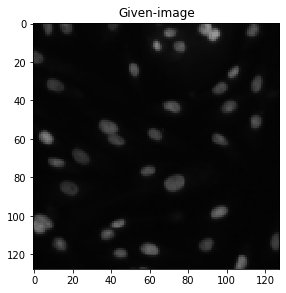

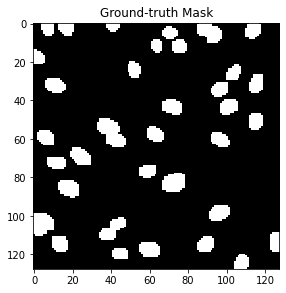

In [4]:
print("An Example of Processed Training Data")
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.title("Given-image")
plt.show()

imshow(np.squeeze(Y_train[image_x]))
plt.title("Ground-truth Mask")
plt.show()

### Defining the model Pipeline

In [5]:
#Building the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
## Conv2D expects pixels in float values, also normalizing all the pixel values.
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path(Encoder)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path(Decoder)
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

################################
#Modelcheckpoint-------to save the model state in a file, if for some reason model crashes during training
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

# Using EarlyStooping to avoid overfitting 
# Also using TensorBoard to visualize final training(or/and validation) vs epochs curve.
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs'),
        checkpointer]


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
________________________________________________________________________________

### Training Phase

In [6]:
X_train1 = X_train[:X_train.shape[0]-2]
Y_train1 = Y_train[:Y_train.shape[0]-2]

# Splitting 2 images for test-set
# Not for accuracy measuring puporse, but we will use them just for visualization purpose(towards the end)
X_test = X_train[X_train.shape[0]-2:]
Y_test = Y_train[Y_train.shape[0]-2:]

X_train = X_train1
Y_train = Y_train1

# Also 10% of taining set is then taken for validation set.
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=40, callbacks=callbacks)

####################################


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
# preds_test = model.predict(X_test, verbose=1)

# Every pixel value belonged b/w 0 and 1. (we normalized the dataset before training)
# Threshold is taken as 0.5, 
# every pixel grater than 0.5 is treated as 1 and
# every pixel lower than 0.5 is treated as 0.
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)



Train on 601 samples, validate on 67 samples
Epoch 1/40
592/601 [============================>.] - ETA: 0s - loss: 0.6326 - acc: 0.7782
Epoch 00001: val_loss improved from inf to 0.51059, saving model to model_for_nuclei.h5
601/601 [==============================] - 70s 116ms/sample - loss: 0.6297 - acc: 0.7794 - val_loss: 0.5106 - val_acc: 0.8016
Epoch 2/40
592/601 [============================>.] - ETA: 1s - loss: 0.3485 - acc: 0.8316
Epoch 00002: val_loss improved from 0.51059 to 0.22818, saving model to model_for_nuclei.h5
601/601 [==============================] - 74s 123ms/sample - loss: 0.3468 - acc: 0.8326 - val_loss: 0.2282 - val_acc: 0.8927
Epoch 3/40
592/601 [============================>.] - ETA: 1s - loss: 0.2037 - acc: 0.9172
Epoch 00003: val_loss improved from 0.22818 to 0.15790, saving model to model_for_nuclei.h5
601/601 [==============================] - 71s 118ms/sample - loss: 0.2030 - acc: 0.9175 - val_loss: 0.1579 - val_acc: 0.9344
Epoch 4/40
592/601 [============

Checking Out Random Image from Train Set


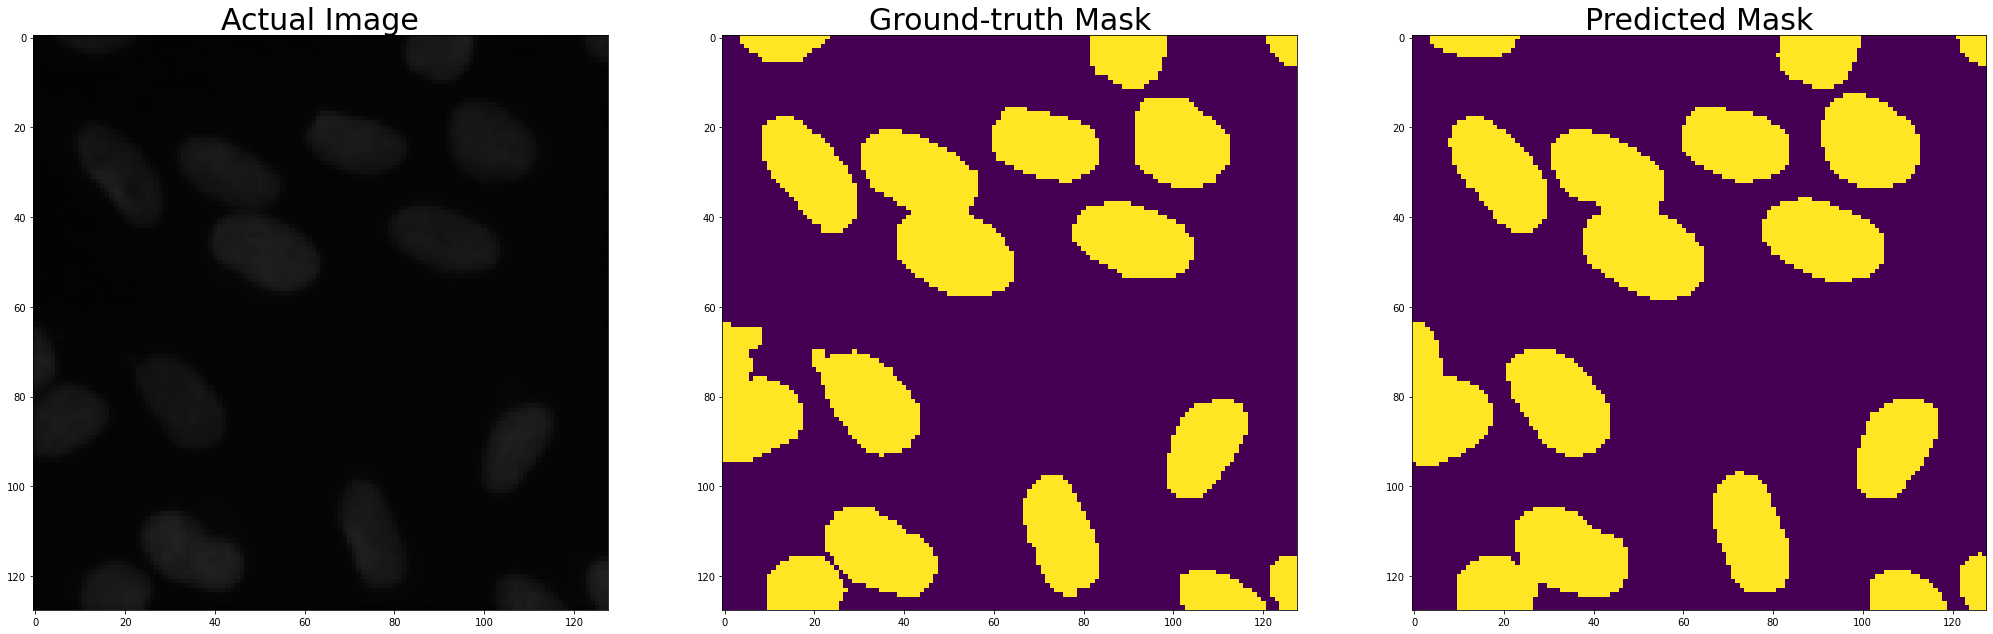

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Checking  some random training samples
print("Checking Out Random Image from Train Set")
ix = random.randint(0, len(preds_train_t))

fig = plt.figure(figsize=(35,35))
fig.subplots_adjust(hspace=0.2 , wspace=0.2)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(18, 12), dpi=200, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,3,1)
ax.set_title('Actual Image',fontsize=30)
ax.imshow(X_train[ix])

ax = fig.add_subplot(1,3,2)
ax.set_title('Ground-truth Mask',fontsize=30)
ax.imshow(np.squeeze(Y_train[ix]))

ax = fig.add_subplot(1,3,3)
ax.set_title('Predicted Mask',fontsize=30)
ax.imshow(np.squeeze(preds_train_t[ix]))

Checking Out Random Image from Validation Set


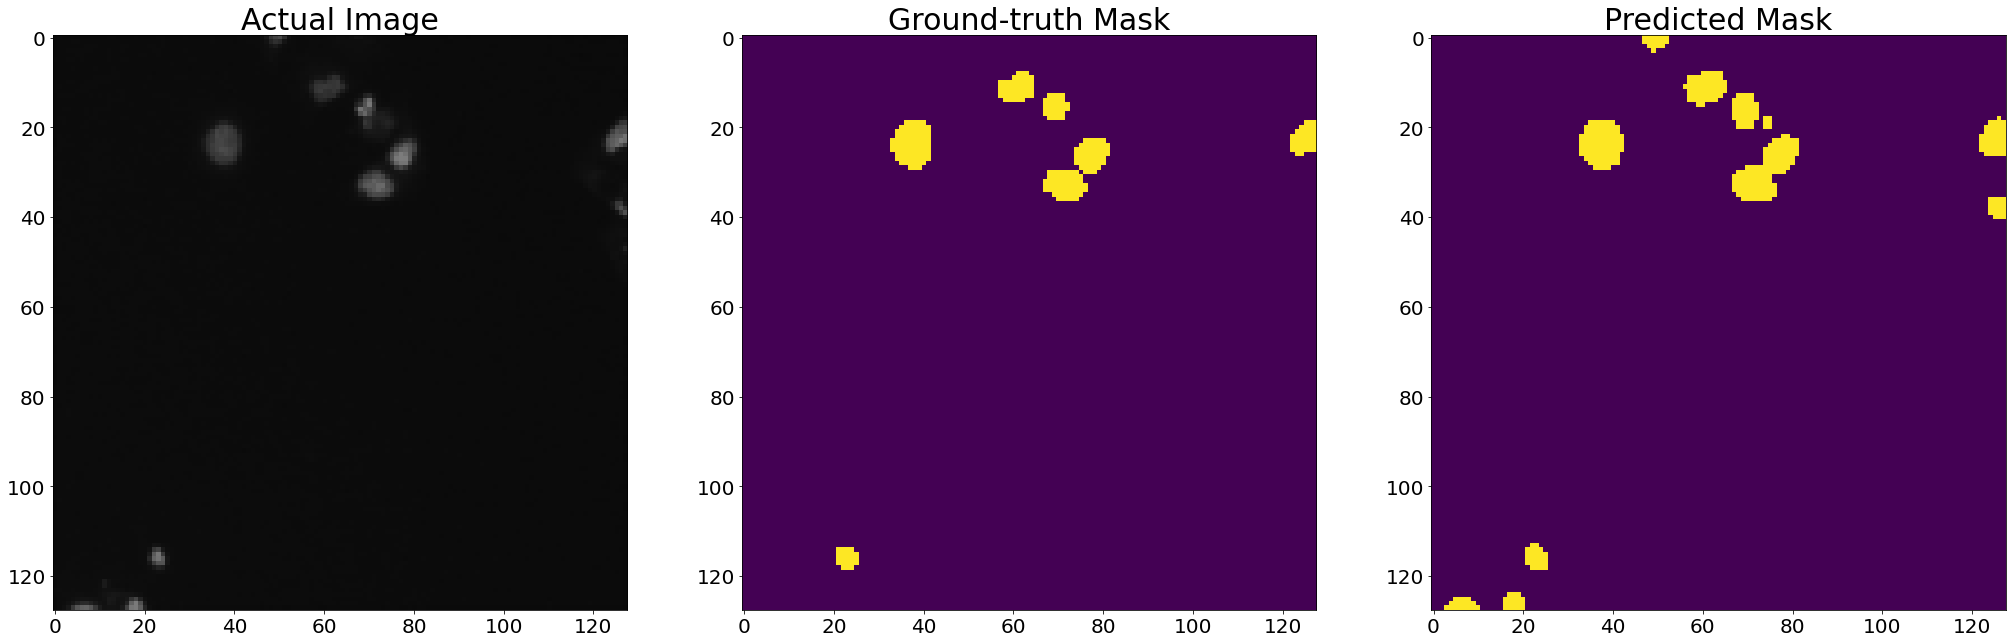

In [9]:
#----------------------------------------------------------------------------------
# Checking some random validation samples
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

ix = random.randint(0, len(preds_val_t))
print("Checking Out Random Image from Validation Set")

fig = plt.figure(figsize=(35,35))
fig.subplots_adjust(hspace=0.2 , wspace=0.2)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(18, 12), dpi=200, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,3,1)
ax.set_title('Actual Image',fontsize=30)
ax.imshow(X_train[int(X_train.shape[0]*0.9):][ix])


ax = fig.add_subplot(1,3,2)
ax.set_title('Ground-truth Mask',fontsize=30)
ax.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))

ax = fig.add_subplot(1,3,3)
ax.set_title('Predicted Mask',fontsize=30)
ax.imshow(np.squeeze(preds_val_t[ix]))

Example-----Reversing the pixels of Validation Set images


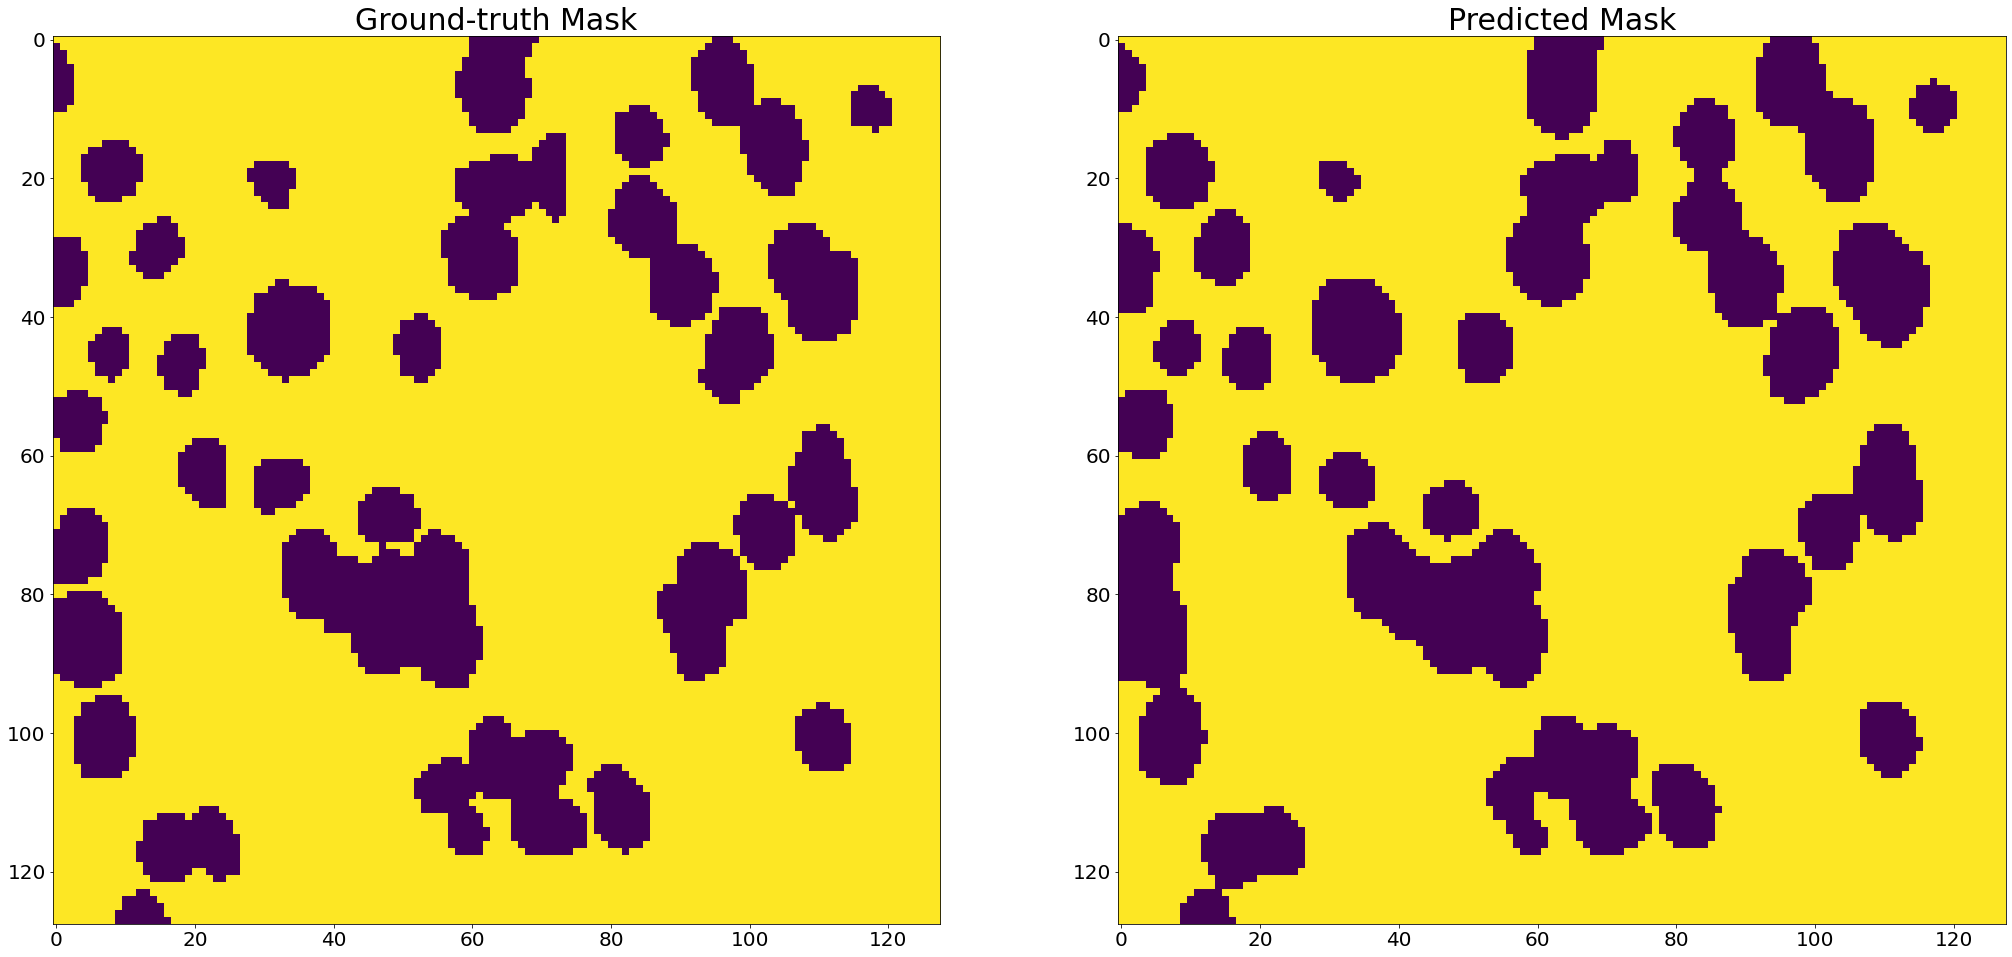

In [10]:
# Defining y_true and y_pred -------to calculate performance metric---- IOU and DICE
y_true = Y_train[int(Y_train.shape[0]*0.9):].astype('float32')
y_pred = preds_val_t.astype('float32')

# reversing the images of validation set
# Later, we will use this complement image to calculate IOU_background and DICE_background corresponding to original val_images 
y_true_black = 1-Y_train[int(Y_train.shape[0]*0.9):].astype('float32')
y_pred_black = 1- preds_val_t.astype('float32')

ix = random.randint(0, len(preds_val_t))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

print("Example-----Reversing the pixels of Validation Set images")

fig = plt.figure(figsize=(35,35))
fig.subplots_adjust(hspace=0.2 , wspace=0.2)


ax = fig.add_subplot(1,2,1)
ax.set_title('Ground-truth Mask',fontsize=30)
ax.imshow(y_true_black[ix])

ax = fig.add_subplot(1,2,2)
ax.set_title('Predicted Mask',fontsize=30)
ax.imshow(y_pred_black[ix])

### Performace Metrics ----IOU & DICE

In [11]:
def give_iou_dice(y_pred,y_true):

    axes = (1,2) # W,H axes of each image
    intersection = np.sum(np.logical_and(y_pred, y_true), axis=axes)
    # intersection = np.sum(np.abs(y_pred * y_true), axis=axes)
    union = np.sum(np.logical_or(y_pred, y_true), axis=axes)
    mask_sum = np.sum(np.abs(y_true), axis=axes) + np.sum(np.abs(y_pred), axis=axes)
    # union = mask_sum  - intersection

    smooth = .001 # to prevent-----( 0/0= nan  )------such cases
    iou = (intersection + smooth) / (union + smooth)
    dice = 2 * (intersection + smooth)/(mask_sum + smooth)

#     print(iou.shape)

#     print("pre: ",iou)

    iou = np.mean(iou)
    dice = np.mean(dice)

    print("iou: {}".format(iou))
    print("dice: {}".format(dice))
    
    return iou,dice

print("iou and dice calculated for White pixels----\n")
iouW, diceW = give_iou_dice(y_pred,y_true)
print("\n")
print("iou and dice calculated for Black pixels------\n")
iouB, diceB = give_iou_dice(y_pred_black,y_true_black)

iou_T = (iouW+iouB)/2
dice_T = (diceW+diceB)/2

print("\nThe final IOU and Dice metrics calculated for the model:")
print("iou: {}".format(iou_T),"\ndice: {}".format(dice_T))
print("\nThese iou and dice values are evaluated for validation set, as test-set didn't had any given true masks")

iou and dice calculated for White pixels----

iou: 0.8389312916826821
dice: 0.9078408673497741


iou and dice calculated for Black pixels------

iou: 0.9540827196545468
dice: 0.9758305754095381

The final IOU and Dice metrics calculated for the model:
iou: 0.8965070056686144 
dice: 0.9418357213796561

These iou and dice values are evaluated for validation set, as test-set didn't had any given true masks


### Calculation of Confusion Matrix ------For Validation Set Images

In [12]:
def confusion_matrix(preds, labels, conf_m):
#     preds = normalize(preds,0.9) # returns [0,1] tensor
    preds = preds.flatten()
    labels = labels.flatten()
    for i in range(len(preds)):
        if preds[i]==1 and labels[i]==1:
            conf_m[0][0] += 1/(len(preds)) # TP
        elif preds[i]==1 and labels[i]==0:
            conf_m[0][1] += 1/(len(preds)) # FP
        elif preds[i]==0 and labels[i]==0:
            conf_m[1][1] += 1/(len(preds)) # TN
        elif preds[i]==0 and labels[i]==1:
            conf_m[1][0] += 1/(len(preds)) # FN 
    return conf_m
confm=[[0,0],[0,0]]

# y_true = np.array([[0,0,0],[0,1,0],[0,1,0]])
# y_pred = np.array([[1,1,1],[1,1,1],[1,1,1]])
print(len(y_pred.flatten()))
confm = confusion_matrix(y_pred,y_true,confm)
print("CONFUSION MATRIX-------")
confm

1097728
CONFUSION MATRIX-------


[[0.18947954320131039, 0.024759321070416642],
 [0.008965791161381489, 0.7767953445623779]]

In [13]:
def get_confusion_matrix_intersection_mats(groundtruth, predicted):
    """ Returns dict of 4 boolean numpy arrays with True at TP, FP, FN, TN
    """

    confusion_matrix_arrs = {}

    groundtruth_inverse = np.logical_not(groundtruth)
    predicted_inverse = np.logical_not(predicted)

    confusion_matrix_arrs['tp'] = np.logical_and(groundtruth, predicted)
    confusion_matrix_arrs['tn'] = np.logical_and(groundtruth_inverse, predicted_inverse)
    confusion_matrix_arrs['fp'] = np.logical_and(groundtruth_inverse, predicted)
    confusion_matrix_arrs['fn'] = np.logical_and(groundtruth, predicted_inverse)

    return confusion_matrix_arrs

## Confusion Matrix Overlay Mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cyan - TP
Magenta - FP
Yellow - FN
Black - TN


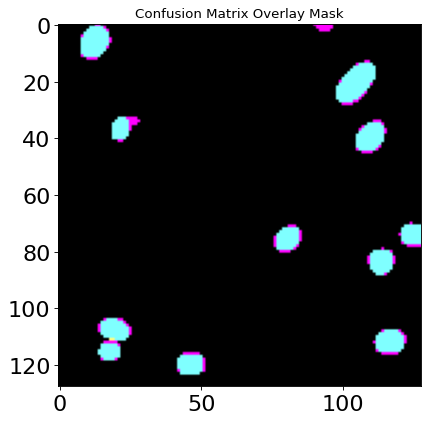

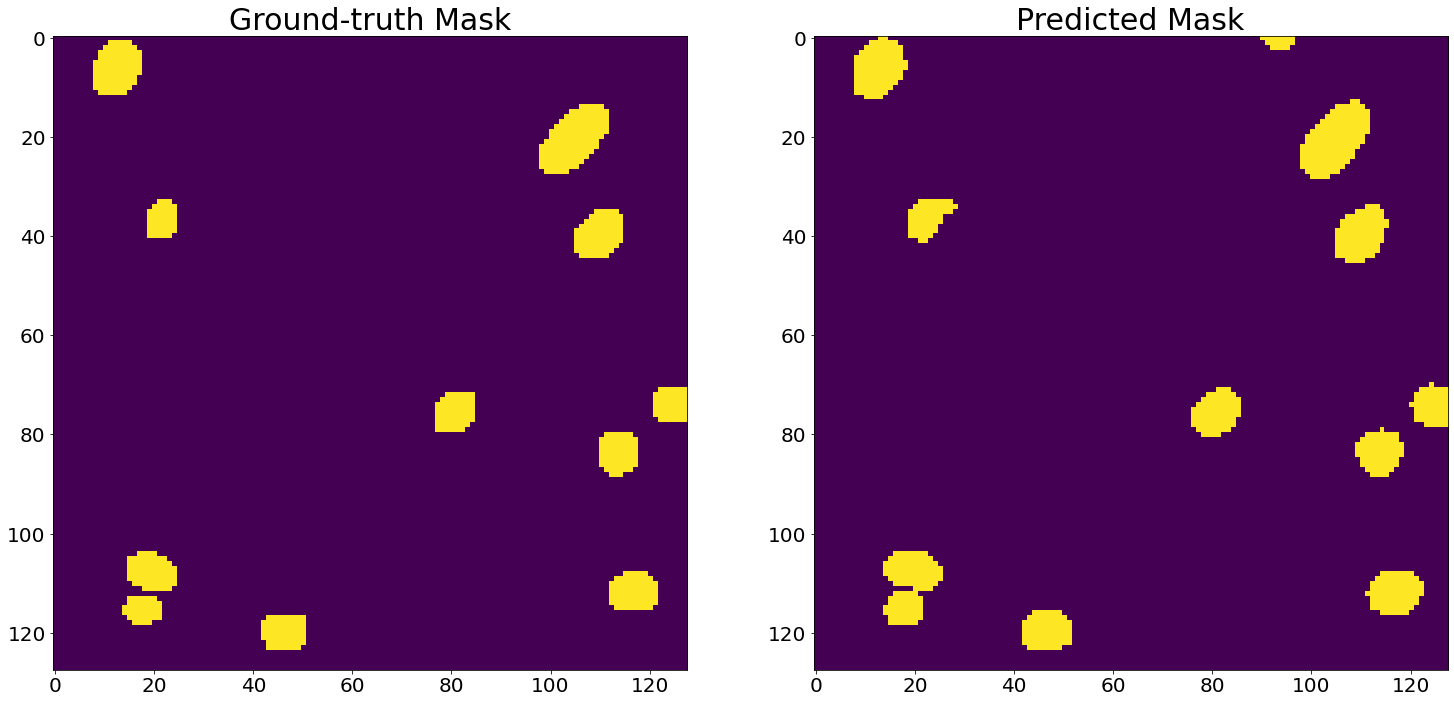

In [14]:
import cv2
def get_confusion_matrix_overlaid_mask(image, groundtruth, predicted, alpha, colors):
    """
    Returns overlay the 'image' with a color mask where TP, FP, FN, TN are
    each a color given by the 'colors' dictionary
    """
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    masks = get_confusion_matrix_intersection_mats(groundtruth, predicted)
    color_mask = np.zeros_like(image)
    for label, mask in masks.items():
        color = colors[label]
        mask_rgb = np.zeros_like(image)
        mask_rgb[mask != 0] = color
        color_mask += mask_rgb
    return cv2.addWeighted(image, alpha, color_mask, 1 - alpha, 0)

alpha = 0.5
confusion_matrix_colors = {
   'tp': (0, 255, 255),  #cyan
   'fp': (255, 0, 255),  #magenta
   'fn': (255, 255, 0),  #yellow
   'tn': (0, 0, 0)     #black
   }

# X_val_true = np.squeeze(X_train[int(X_train.shape[0]*0.9):].astype('float32')[1])
validation_mask = get_confusion_matrix_overlaid_mask(np.squeeze(y_true[2]), np.squeeze(y_true[2]), np.squeeze(y_pred[2]), alpha, confusion_matrix_colors)
print('Cyan - TP')
print('Magenta - FP')
print('Yellow - FN')
print('Black - TN')

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(validation_mask)
# plt.axis('off')
plt.title('Confusion Matrix Overlay Mask')
plt.show()



fig = plt.figure(figsize=(25,25))
fig.subplots_adjust(hspace=0.2 , wspace=0.2)

ax = fig.add_subplot(1,2,1)
ax.set_title('Ground-truth Mask',fontsize=30)
ax.imshow(y_true[2])

ax = fig.add_subplot(1,2,2)
ax.set_title('Predicted Mask',fontsize=30)
ax.imshow(y_pred[2])


2/2 [==============================] - 0s 27ms/sample


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Plotting Confusion-matrix overlay mask for 2 test images
Cyan - TP
Magenta - FP
Yellow - FN
Black - TN


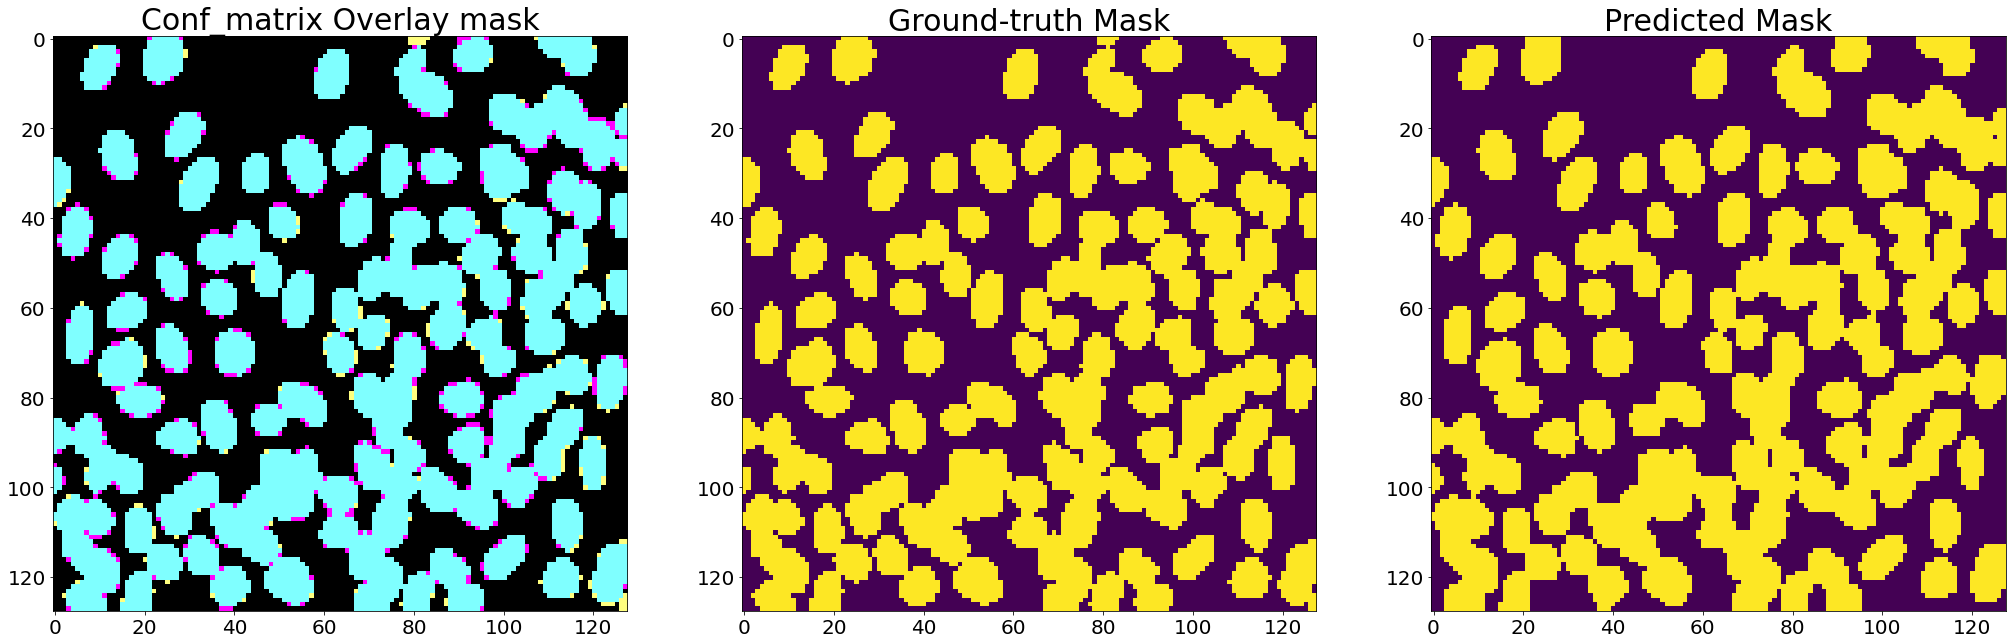

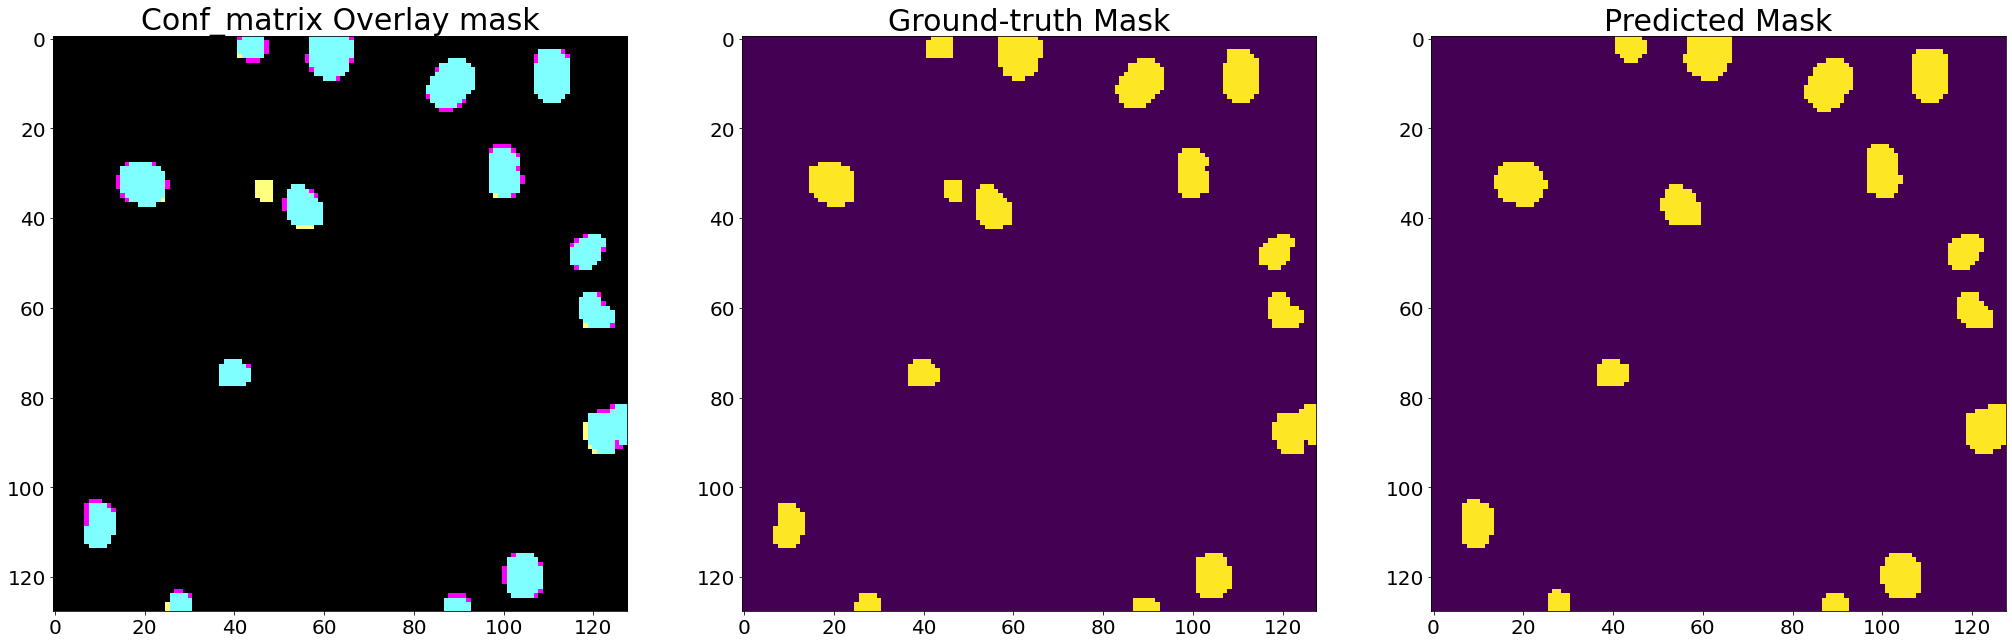

In [20]:
preds_test = model.predict(X_test, verbose=1)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

y_pred_test = preds_test_t.astype('float32')
y_true_test = Y_test.astype('float32')

test1_confusion_mask = get_confusion_matrix_overlaid_mask(np.squeeze(y_true_test[0]), np.squeeze(y_true_test[0]), np.squeeze(y_pred_test[0]), alpha, confusion_matrix_colors)
test2_confusion_mask = get_confusion_matrix_overlaid_mask(np.squeeze(y_true_test[1]), np.squeeze(y_true_test[1]), np.squeeze(y_pred_test[1]), alpha, confusion_matrix_colors)


#----------------------------------------------------------------------------------
# Plotting Confusion-matrix overlay mask for 2 test images
print("Plotting Confusion-matrix overlay mask for 2 test images")
print('Cyan - TP')
print('Magenta - FP')
print('Yellow - FN')
print('Black - TN')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(35,35))
fig.subplots_adjust(hspace=0.2 , wspace=0.2)

ax = fig.add_subplot(1,3,1)
ax.set_title('Conf_matrix Overlay mask',fontsize=30)
ax.imshow(test1_confusion_mask)

ax = fig.add_subplot(1,3,2)
ax.set_title('Ground-truth Mask',fontsize=30)
ax.imshow(Y_test[0])

ax = fig.add_subplot(1,3,3)
ax.set_title('Predicted Mask',fontsize=30)
ax.imshow(y_pred_test[0])

#----------------------------------

fig = plt.figure(figsize=(35,35))
fig.subplots_adjust(hspace=0.2 , wspace=0.2)

ax = fig.add_subplot(1,3,1)
ax.set_title('Conf_matrix Overlay mask',fontsize=30)
ax.imshow(test2_confusion_mask)

ax = fig.add_subplot(1,3,2)
ax.set_title('Ground-truth Mask',fontsize=30)
ax.imshow(Y_test[1])

ax = fig.add_subplot(1,3,3)
ax.set_title('Predicted Mask',fontsize=30)
ax.imshow(y_pred_test[1])

# Conclusion

In [25]:
print("The performance (measured using IOU and DICE) in validation set-----")
print(" 1. IOU: {}".format(iou_T))
print(" 2. DICE: {}".format(dice_T))
print("which is in coherence with the performace claimed result in the published paper, i.e., 0.92 IOU.")

The performance (measured using IOU and DICE) in validation set-----
 1. IOU: 0.8965070056686144
 2. DICE: 0.9418357213796561
which is in coherence with the performace claimed result in the published paper, i.e., 0.92 IOU.
